## The Selg-Organizing Map-Based Decision Support System For The Investment Strategy on The Stock Market 

### Aim of The Project
The purpose of the following work is to create an investment strategy operating on the historical data from the NASDAQ stock exchange. Such a system may support decisions making by the human during investments on a stock market. 

The following problem will be solved by the usage of unsupervised clustering algorithm bases on the neural networks - **Self-Organizing Kohonen Maps**. Its advantage comparing to the supervised algorithms is that unsupervised learning may provide better results, as no action is defined for the particular situation on the market. Instead, the most similar configurations of shares’ prices may be identified and labeled.

### System Description
Because the nature of each stock market's company is different, it is not possible to build a single model for all of them. Therefore, the separate model will be trained for each company, as the particular enterprise is unique and its behavior in time does not depend on the other companies.

The whole process consists of two main phases which are: **data preparation** and **modeling**. During the first phase, a set of parameters describing a company will be created in a form of a time-series dataset. Those parameters will be calculated from the available coefficients described in the next section. In the next phase, which is modeling, similar groups of vectors (**clusters**) will be created, basing on dataset features in a particular timestamp. Then, each cluster will be marked as **'buy'**, **'sell'** or **'hold'**. The labels will be assigned to the clusters according to their mean return value. In the picture below we can see good moments for selling or buying a stock:

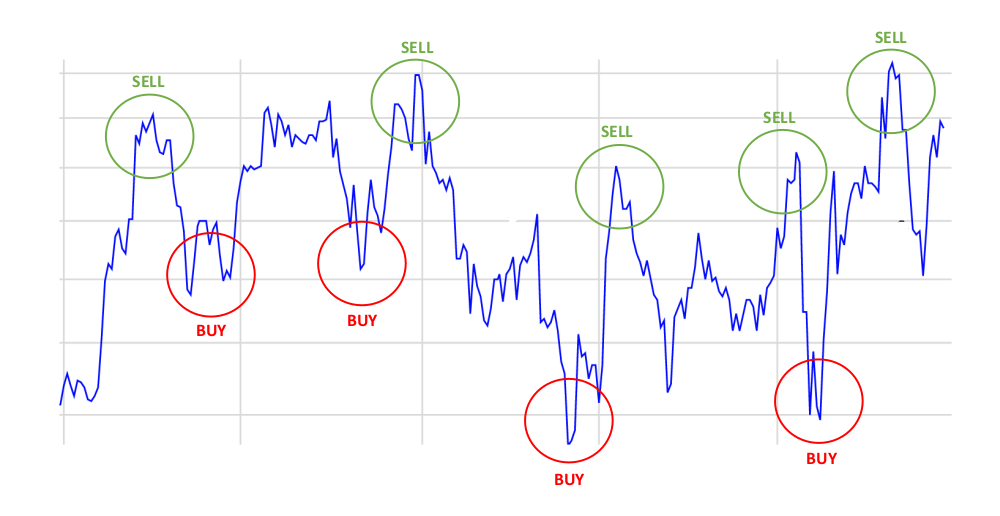

In [24]:
from IPython.display import display, Image
display(Image(filename='../images/buy_sell.jpg'))

According to the thresholds due to which we set cluster labels, a strategy can be more or less aggressive. Thresholds don't need to be symmetric as they reflect the
the character of the investor and his inclination towards taking the risk.

### Data
To make our model working correctly we need to operate on stocks that have significant fluctuations in their prices. In an opposite case, we would probably mark every moment in the time series as 'hold'.

The example companies which has been chosen comes from NASDAQ stock exchanges: BIDU, HGSH, and Intel. The market summary of each company can be seen in the pictures above:

BIDU


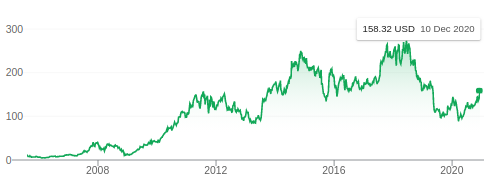

HGSH


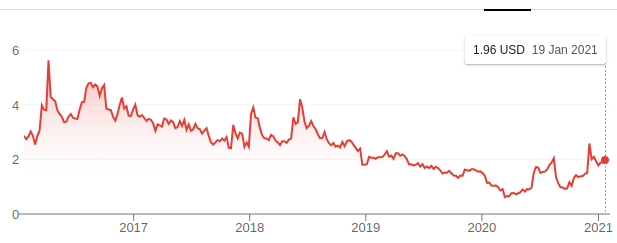

Intel


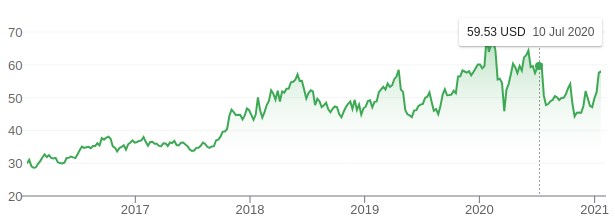

In [30]:
print("BIDU")
display(Image(filename='./../images/baidu.png'))
print("HGSH")
display(Image(filename='../images/HGSH.png'))
print("Intel")
display(Image(filename='../images/intel.png'))

### Self-Organizing Maps
The self-organizing map (SOM) is an automatic data-analysis method. It is widely applied to clustering problems and data exploration in industry, finance, natural sciences, and linguistics. The SOM is related to the classical vector quantization (VQ), which is used extensively in digital signal processing and transmission. Like in VQ, the SOM represents a distribution of input data items using a finite set of models. In the SOM, however, these models are automatically associated with the nodes of a regular (usually two-dimensional) grid in an orderly fashion such that more similar models become automatically associated with nodes that are adjacent in the grid, whereas less similar models are situated farther away from each other in the grid. This organization, a kind of similarity diagram of the models, makes it possible to obtain an insight into the topographic relationships of data, especially of high-dimensional data items. If the data items belong to certain predetermined classes, the models (and the nodes) can be calibrated according to these classes. An unknown input item is then classified according to that node, the model of which is most similar with it in some metric used in the construction of the SOM.


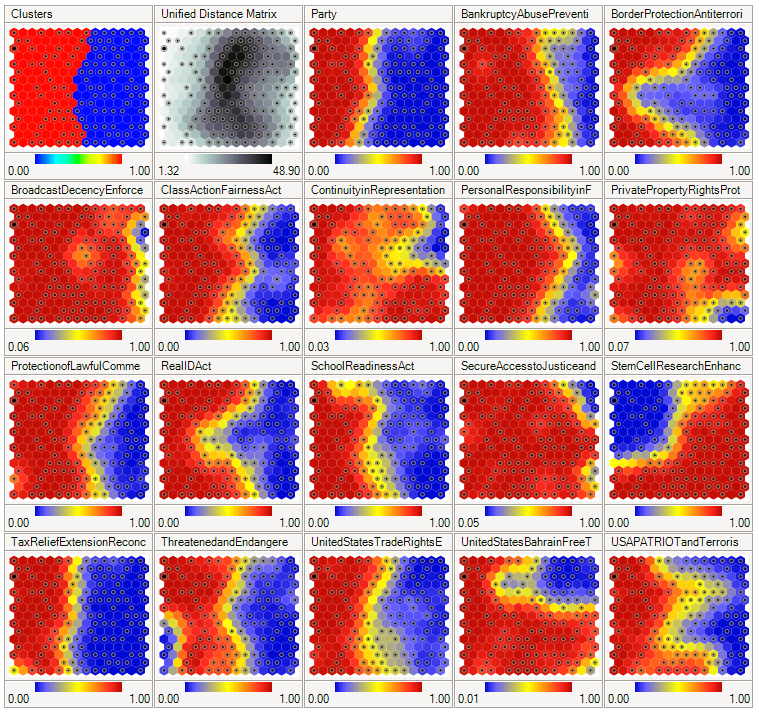

In [4]:
display(Image(filename='./../images/koh.png'))

The picture describes a self-organizing map showing U.S. Congress voting patterns. The input data was a table with a row for each member of Congress, and columns for certain votes containing each member's yes/no/abstain vote. The SOM algorithm arranged these members in a two-dimensional grid placing similar members closer together. The first plot shows the grouping when the data are split into two clusters. The second plot shows the average distance to neighbors: larger distances are darker. The third plot predicts Republican (red) or Democratic (blue) party membership. The other plots each overlay the resulting map with predicted values on an input dimension: red means a predicted 'yes' vote on that bill, blue means a 'no' vote.

### Implementation

The whole project is split into few scripts:
* **config.py** - script with a basic configuration for self-organizing map
* **extract_features.ipynb** - notebook used for creating attributes described in Ph.D. Piotr Bliski's article basing on raw data from the stock market. 
* **data_prepare.py** - script with functions that are used for loading and preprocessing the data. We assume that the data which is used in that script has already created all attributes from an article (is the output of extract_features.ipynb)
* **main.ipynb** - the main notebook with the report, testing attributes, and final strategy creation
* **minisom.py** - script with self-organizing map
* **modeling.py** - script with functions used for modeling
* **plotting.py** - script with all the functions used for plotting

Directories Description:
* **data** - contains raw and prepared data
* **scripts** - contains all the scripts used for the task
* **images** - contains images for the raport

We decided that in this project it will be more readable if we resign from creating any classes, so each python consists only of the functions.

### Functions description

**extract_features.py**

extract_features.py contains helper methods that calculate specific features:
* **EMA** - Exponential Moving Average
* **RoR** - Rate of Return
* **grad_price_trend** - gradient of the price trend
* **RSI** - Relative Strength Index
* **MACD** - Moving Average Convergence / Divergence
* **CCI** - Commodity Channel Index

extract_features.py also contains methods:
* **calculate_features** - based on the DataFrame structure containing closing, highest and lowest
prices calculates 16 features and returns the results as another DataFrame.
* **read_and_extract_features** - this method reads a .csv file containg data on prices, calculates features and saves results
as another .csv file.


**data_prepare.py**
* **variance_inflation_factors** - Design matrix with all explanatory variables, as for example used in regression.
* **read_csv** - Reads certain csv file.
* **load_data_from_csv** - Loads data from certain csv file and makes some basics preprocessing.
    - converts date column which is in a string into DateTime,
    - sorts data ascending by date,
    - creates a column with price in 20 days,
    - calculates a profit
* **get_data** - Getting data needed for modeling. Reads CSV with prepared features,
    scales the data and selects specific column basing on columns_list.
    If columns_list is set to None, read all the columns.
    

**modeling.py**
* **som_predict** - Predicts cluster based on a data row and the model.
* **train_som** - Trains self-organizing map and returns train and test datasets with predicted clusters.
* **get_profit_per_cluster** - Returns a data frame with mean profit per cluster basing on a df given as an argument
* **get_mean_profit_per_class_from_train_df** - Basing on a dataframe given as an argument, returns mean profit per class (buy, sell) in training dataset.
    - sort data frame descending by profit
    - marks 1/3 of clusters with the highest profit as buy
    - marks 1/3 of clusters with the lowest profit as sell
    - if data contains less than 3 different clusters returns AssertionError
* **get_mean_profit_per_class_from_test_df** - Basing on a data frame given as an argument, and list of buy and sell clusters. Returns mean profit per class (buy, sell) in the testing dataset.
* c**reate_final_strategy** - Used for creating a final strategy (not for testing)
    - reads preprocessed split into training and testing sets data
    - train som model
    - calculates mean profit per cluster in the training dataset
    - gets the list of sell and buy clusters
* **create_strategy** - Creates strategy which can be used in testing part of the script.
    - reads preprocessed split into training and testing sets data
    - train som model
    - calculates mean profit per cluster in training and testing dataset
    - gets mean profits
* **set_model_parameters** - Returns parameters that should be used in one iteration of the testing process.
* **test_som_parameters** - Tests parameters of som:
    - initializes empty lists for measures metrics
    - in each loop iteration creates strategy and append calculated metrics to the proper lists


**plotting.py**
* **visualize_dataset_attributes** - Plots all the column of df
* **choose_divider** - Depending on the test_type returns 1, 100, 1000,
    which is then used to divide testing value in a loop.
    The function is needed because in range() function
    there is no possibility to increase values for non-integer values.
* **make_single_plot** - Make single plot of the metric tested in a project.
* **choose_plot_title** - Returns proper image title according to the test_type
* **choose_xlabel** - Returns proper xlabel according to the test_type
* **plot_summary** - Plots summary of the training process.
* **plot_strategy** - Plots stock prices ordered by the date and marks buy and sell
    moments returned by an algorithm.
* **plot_correlation_matrix** - Plots correlation matrix from dataframe.


In [1]:
from modeling import *
from data_prepare import *
from plotting import *

import warnings; warnings.simplefilter('ignore')

filename = 'features-BIDU-5y.csv'

### Data Preparation
After creating a dataset attributes we load all the datasets from csv saved in ../data directory. The initial sample data loaded from a file looks as follow:

In [2]:
initial_df = read_csv(filename)
initial_df

,Date,Price,High,Low,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,12/11/2020,161.24,163.4000,157.68,0.018276,0.043439,0.044515,0.004770,0.061714,0.087954,-4.721,-1.414,-2.233939,-0.025163,-0.026239,89.736437,4.714136,17.886667,0.184630,223.835410
1,12/10/2020,158.32,158.8000,151.73,0.043439,0.044515,0.004770,0.001595,0.087954,0.049285,-3.579,-1.435,-1.718667,-0.001076,0.038668,88.029320,3.751666,17.073333,0.160023,208.812402
2,12/09/2020,151.59,156.5631,147.01,0.044515,0.004770,0.001595,-0.001179,0.049285,0.006365,-1.562,-1.624,-1.320121,0.039744,0.042920,82.073433,2.765943,11.633333,0.067009,172.894826
3,12/08/2020,144.99,147.0700,143.50,0.004770,0.001595,-0.001179,0.003751,0.006365,0.000416,-0.264,-1.479,-1.189152,0.003175,0.005950,68.938333,2.152806,5.742500,0.007435,76.016080
4,12/07/2020,144.30,145.2000,142.54,0.001595,-0.001179,0.003751,0.024230,0.000416,0.002571,-0.845,-1.696,-1.361333,0.002774,-0.002156,66.729555,2.010907,5.238333,-0.023945,54.284318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,01/28/2016,156.94,162.7800,154.53,-0.008439,-0.054170,-0.002749,-0.021435,-0.062609,-0.056920,3.773,0.427,0.985758,0.045731,-0.005689,26.006670,-10.374825,-10.569167,-0.099960,-126.986665
1229,01/27/2016,158.27,167.9100,157.42,-0.054170,-0.002749,-0.021435,0.009450,-0.056920,-0.024184,2.667,0.830,0.411455,-0.051421,-0.032735,27.352439,-10.169955,-10.328333,-0.147298,-105.018416
1230,01/26/2016,167.08,168.3600,162.89,-0.002749,-0.021435,0.009450,0.027322,-0.024184,-0.011985,-0.216,1.588,0.190242,0.018686,-0.012200,38.912177,-9.895959,-2.125833,-0.108288,-74.144197
1231,01/25/2016,167.54,173.7400,167.31,-0.021435,0.009450,0.027322,-0.006284,-0.011985,0.036772,-0.920,1.358,0.240364,-0.030885,-0.048757,39.670855,-10.299317,-3.171667,-0.089605,-55.403515


In [3]:
initial_df.describe()

,Price,High,Low,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,172.515547,174.822947,170.245721,-0.000041,-0.000033,-0.000074,-0.000100,-0.000074,-0.000107,0.009556,0.022070,0.017072,-0.000007,0.000033,50.549451,-0.302682,-0.104406,0.001442,8.954987
std,47.963589,48.482143,47.377428,0.022323,0.022331,0.022297,0.022264,0.031675,0.031632,1.977874,1.970987,1.409916,0.031476,0.031225,16.812857,4.233752,8.517469,0.083195,109.462488
min,83.620000,91.660000,82.000000,-0.180553,-0.180553,-0.180553,-0.180553,-0.268139,-0.268139,-7.931000,-7.931000,-4.502364,-0.188391,-0.181275,5.842936,-14.811425,-38.565000,-0.320761,-364.783977
25%,126.930000,128.390000,125.930000,-0.010889,-0.010889,-0.010889,-0.010889,-0.015797,-0.015797,-1.123000,-1.116000,-0.805636,-0.016732,-0.017043,39.006251,-2.414870,-3.992500,-0.043910,-76.200621
50%,171.490000,173.940000,169.800000,-0.000195,-0.000195,-0.000209,-0.000209,0.000000,0.000000,-0.007000,0.004000,-0.097636,0.000276,0.000445,50.943976,-0.152934,0.534167,0.007955,16.949388
75%,200.720000,203.360000,196.750000,0.010979,0.010979,0.010956,0.010956,0.016296,0.016296,0.992000,1.001000,0.694909,0.015929,0.017350,62.742290,2.596680,4.932500,0.053479,90.815360
max,284.070000,284.220000,278.600000,0.126767,0.126767,0.126767,0.126767,0.148600,0.148600,12.737000,12.737000,5.523212,0.155300,0.205256,94.962488,11.899037,30.809167,0.280921,350.405309


As we can see, there is no missing data (all the columns contains the same amount of rows). The first four columns which are **Price, High, Low, and Date** were initial data, which was downloaded from the stock market. The rest of the columns which are **f1, f2, ... f16** are attributes created basing on the *Piotr Bliski* article *The SOM-based decision support system for the investment strategy on the stock market* and describes some stock characteristics basing on past prices. 

**Columns Description**
* Date
* Close/Last - the closing price
* High - the highest price during that day
* Low - the lowest price during the day
* f1 - logarithmic RoR (natural algorithm) of the ratio between the current and previous day
* f2 - logarithmic RoR (natural algorithm) of ratio previous day and 2 days before
* f3 - logarithmic RoR (natural algorithm) of the ratio of price from 2 and 3 days before
* f4 - logarithmic RoR (natural algorithm) of the ratio of price from 3 and 4 days before
* f5 - RoR of the ratio of closing price from the current day and 2 days before
* f6 - RoR of the ratio of closing price from 1 and 3 days before
* f7 - gradient of 5-day price trend (starting from the current day)
* f8 - gradient of 5-day price trend (starting from 5 days ago)
* f9 - gradient of 10-day price trend (starting from the current day)
* f10 - the difference between a first and second feature
* f11 - the difference between a first and third feature
* f12 - Relative Strength Index (RSI)
* f13 - Moving Average Convergence/Divergence (MACD) for 12 and 26 days
* f14 - the difference between the current day's closing price and Moving Average for 12 days
* f15 - 14-day Rate of Change (RoC)
* f16 - Commodity Channel Index (CCI) for last 20 days

The initial data needs to be slightly modified before passing it into the model. The whole preprocess is contained in **get_data()** function and consists of:
* converting a date column which is in a string into DateTime
* sorting data ascending by date
* creating a column with price in 20 days
* calculating a profit
* scaling the data
* dropping Date, Price, High, Low columns

The final dataset looks as follow:

In [4]:
# load data
_, df_prepared, _, _, data_columns = get_data(filename)
pd.DataFrame(np.array(df_prepared), columns=data_columns)

,Price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,0.418658,0.517760,0.618259,0.676412,0.567062,0.614664,0.731660,0.339220,0.449439,0.473063,0.458277,0.342839,0.379579,0.168927,0.510180,0.384183,0.432585
1,0.416363,0.578562,0.517760,0.618259,0.676412,0.585389,0.614664,0.373282,0.460567,0.468063,0.602509,0.437417,0.371066,0.184028,0.525256,0.353131,0.406382
2,0.372412,0.411242,0.578562,0.517760,0.618259,0.506838,0.585389,0.512773,0.423892,0.490128,0.398528,0.384289,0.241356,0.173770,0.407020,0.288297,0.363212
3,0.365777,0.560049,0.411242,0.578562,0.517760,0.493186,0.506838,0.566286,0.404393,0.547412,0.681201,0.454259,0.226255,0.166100,0.403548,0.366974,0.332496
4,0.397356,0.716174,0.560049,0.411242,0.578562,0.718056,0.493186,0.474115,0.296497,0.518093,0.687745,0.711422,0.402869,0.183422,0.510925,0.454828,0.379013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0.301222,0.588864,0.670621,0.734566,0.588964,0.705713,0.813160,0.239888,0.396942,0.317122,0.475036,0.353135,0.827977,0.691371,0.688525,0.722775,0.824045
1208,0.302170,0.591799,0.588864,0.670621,0.734566,0.647586,0.705713,0.268338,0.380492,0.292797,0.550765,0.406309,0.831109,0.703943,0.680260,0.713388,0.793226
1209,0.297481,0.566226,0.591799,0.588864,0.670621,0.630892,0.647586,0.354074,0.340623,0.274274,0.525274,0.450979,0.766061,0.709282,0.653101,0.636767,0.699611
1210,0.296533,0.583190,0.566226,0.591799,0.588864,0.624543,0.630892,0.395878,0.297803,0.294755,0.563310,0.462134,0.752225,0.711135,0.639167,0.660704,0.652117


In [5]:
pd.DataFrame(np.array(df_prepared), columns=data_columns).describe()

,Price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.445890,0.587016,0.587052,0.587129,0.587130,0.642722,0.642806,0.384715,0.385022,0.451246,0.548108,0.468889,0.499903,0.541751,0.553762,0.534829,0.521817
std,0.240561,0.072690,0.072695,0.072740,0.072740,0.075776,0.075819,0.095693,0.095622,0.141076,0.091966,0.081059,0.188036,0.158767,0.122959,0.138522,0.153422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214243,0.551865,0.551865,0.551865,0.551865,0.605420,0.605420,0.330039,0.330475,0.369683,0.499676,0.424718,0.371131,0.462054,0.498126,0.459366,0.400936
50%,0.443727,0.586034,0.586109,0.586498,0.586498,0.642914,0.643005,0.383927,0.384048,0.439419,0.548789,0.469973,0.504519,0.544661,0.563292,0.546336,0.532916
75%,0.597568,0.622992,0.622992,0.623139,0.623139,0.680743,0.681208,0.431948,0.432335,0.518170,0.594750,0.513810,0.635558,0.650345,0.626305,0.621619,0.637035
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we could see, because of the scaling ale the columns are in range (0,1). The training dataset consists only of the price of the certain stock and a set of attributes calculated basing on the article.

While training the model it is also good to check if the attributes in the dataset are not correlated with each other.
If so it would negatively influence our model. The popular way of removing correlated attributes is to display a correlation 
matrix of each attribute and then exclude n-1 from n correlated variables, which correlation is greater than 0.75.
In our opinion, it would be not enough because such a method does not take into account colinearity among multiple attributes (multicollinearity).

So before removing attributes basing on the correlation matrix we will apply variance inflation factors methods which is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis.

There are some guidelines we can use to determine whether our VIFs are in an acceptable range. A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity and we are going to stick to that rule.

In [6]:
# callculate variance_inflation_factors and drop columns if needed
variance_inflation_factors_series = variance_inflation_factors(pd.DataFrame(df_prepared))
cols_with_small_vif = list(variance_inflation_factors_series.iloc[variance_inflation_factors_series.values < 10].index)
cols_with_small_vif = list(set(cols_with_small_vif) - set(['const']))
df_prepared = pd.DataFrame(df_prepared)[cols_with_small_vif]
variance_inflation_factors_series

const     0.000000
0         1.089926
1              inf
2              inf
3              inf
4         3.259381
5              inf
6              inf
7        23.218845
8         2.930817
9        31.652664
10             inf
11             inf
12       14.825226
13        2.950047
14       68.283561
15        6.050525
16        7.605981
Name: VIF, dtype: float64

After VIF analysis we decide ( in the case of BIDU data ) to leave attributes with index: 0,4,8,13,15,16.

Now, by looking at the correlation matrix we can exclude the rest of the variables which are still correlated. In the case of BIDU, we will exclude column 15.

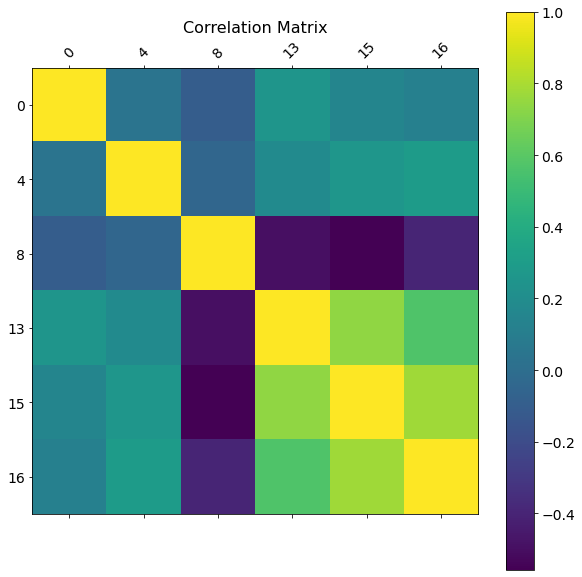

In [7]:
plot_correlation_matrix(pd.DataFrame(df_prepared))

In [8]:
# drop correlated columns
df_prepared = df_prepared.drop(columns=[15])
columns_list = list(df_prepared.columns)
columns_list

[0, 4, 8, 13, 16]

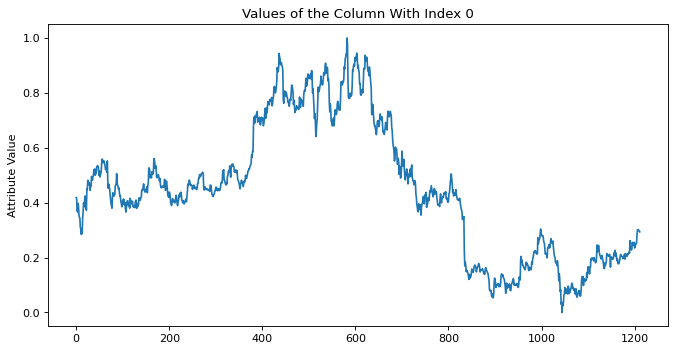

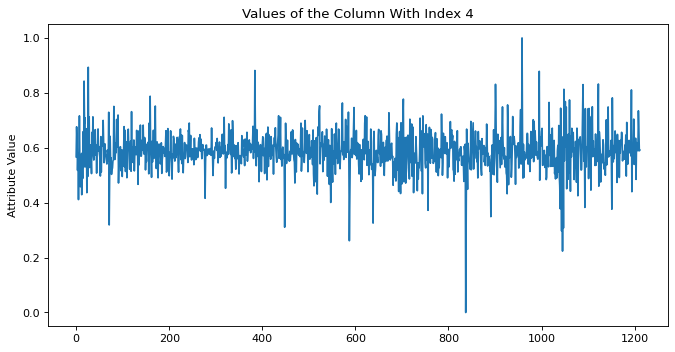

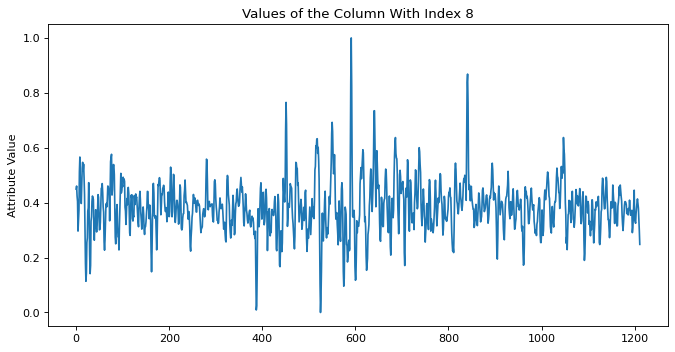

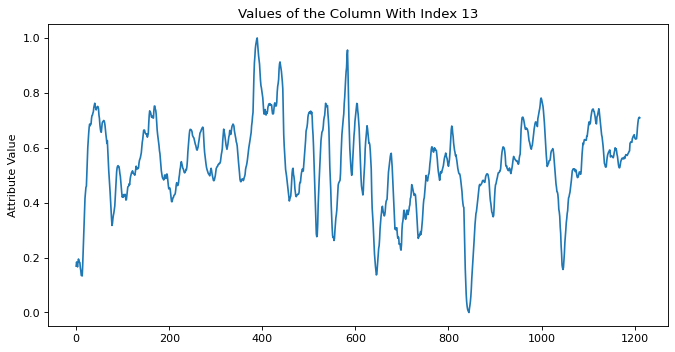

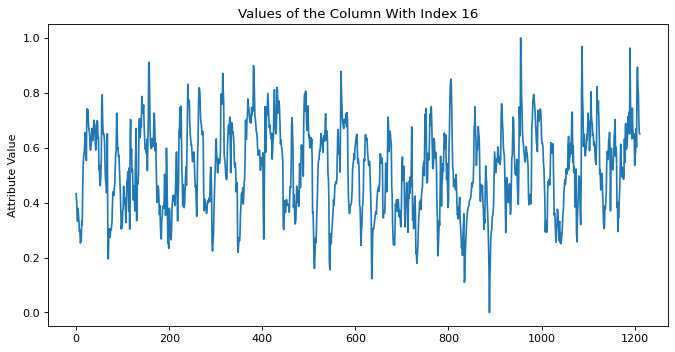

In [9]:
# visualizing parameters of the model after preprocessing
visualize_dataset_attributes(df_prepared)

So the final set of variables which we leave in case of BIDU is [0, 4, 8, 13, 16]

### Testing Model Parameters
#### How Do We Decide On Which Clusters Correspond to Which Class
1. Train the model on a training dataset.
2. Assign cluster to each row in the training dataset.
3. Calculate the mean profit in each cluster.
4. Take 1/3 of all assigned clusters with the lowest profit and assign a selling label to them.
5. Take 1/3 of all assigned clusters with the highest profit and assigned a buy label to them.
6. Assign clusters with labels created on the training dataset to the testing dataset.

**Note**

*The data is sorted by the data ascending, and the testing dataset consists of the data from last year, while training data consists of data from four years starting from the smallest date in the training dataset.*

*We round clusters into a floor and reject the model in a situation in which the number of assigned clusters is smaller than 3. Such a rule lets us avoiding a situation in which one cluster will be assigned to two classes.*

During the testing phase, we are going to test four model parameters: 
* **sigma** - the radius of the different neighbors in the SOM, *default value = 0.3*
* **map_size** - size of the self-organizing map, *default value = 75x75*
* **learning_rate** - determines how much weights are adjusted during each iteration, *default value = 0.01*
* **n_iteration** - amount of iteration during which the model is trained, *default value = 1000*

In the testing dict, we can define the parameters that we want to test and the ranges in which the parameter will be tested. For example, if we put there a key 'n_iter' and assign it a range (100, 1000, 50) it means that the model will be testes on default parameters (defined in config.py) with the changing n_iter parameter, which will take values in the range from 100 to 1000, with the incrementation step 50 (so its values will be 100, 150, ... 950).

**Important Note**

*In the case of learning_rate and sigma, the range value is always divided by 1000 (in case of learning_rate) and 100 (in case of sigma) as those parameters takes smaller values. It is done in this way because we can't increment the loop with non-integer values* 



In [10]:
testing_dict = {}
testing_dict['sigma'] = (1,100,5)
testing_dict['map_size'] = (1,100,1)
testing_dict['learning_rate'] = (1,1000,50)
testing_dict['n_iter'] = (100,1000,50)
testing_dict

{'sigma': (1, 100, 5),
 'map_size': (1, 100, 1),
 'learning_rate': (1, 1000, 50),
 'n_iter': (100, 1000, 50)}

**During each iteration of testing we test:**
* Number of assigned clusters on training and testing datasets, which is the number of different clusters into which the data was assigned.
* Mean profit in buy clusters
* Mean profit in sell clusters

**Important Note**

Profit which is used frequently in the further part of the reports means: price in 20 days from now - price now

Testing sigma


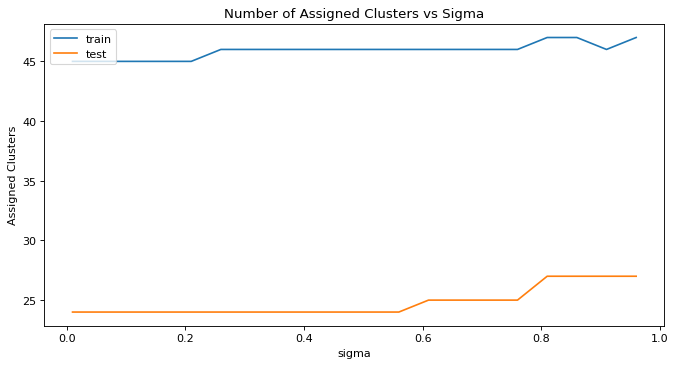

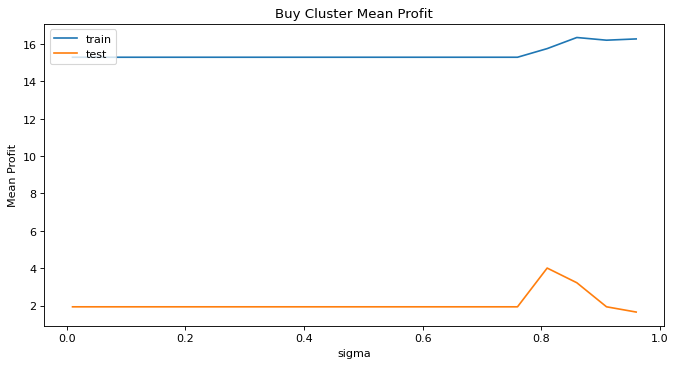

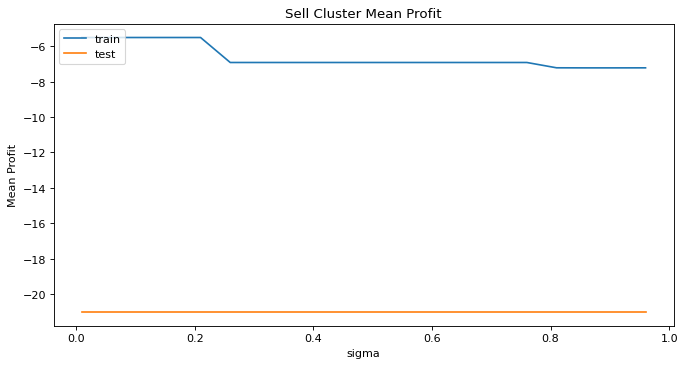

Saving photos to ./../images
Testing map_size


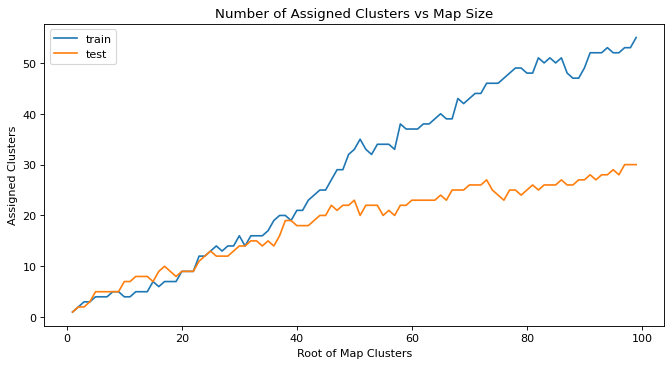

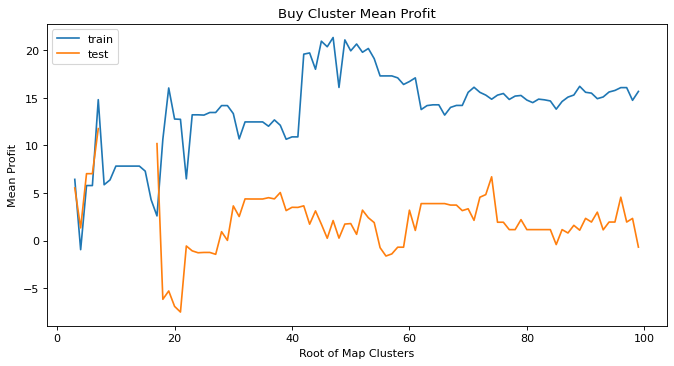

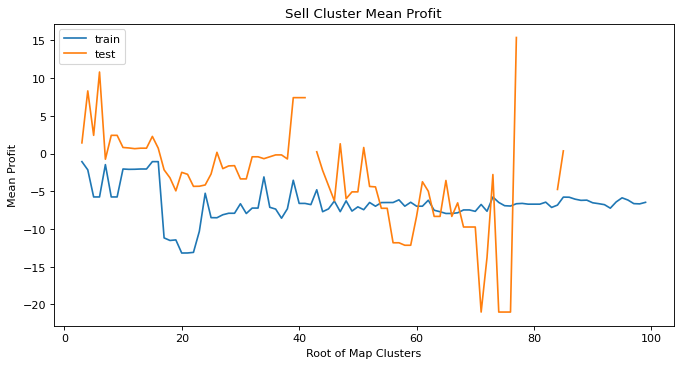

Saving photos to ./../images
Testing learning_rate


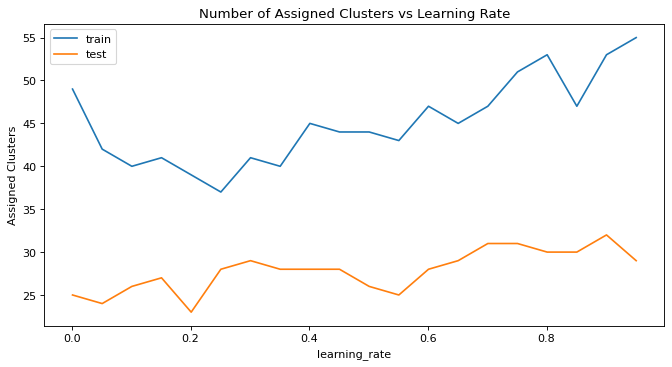

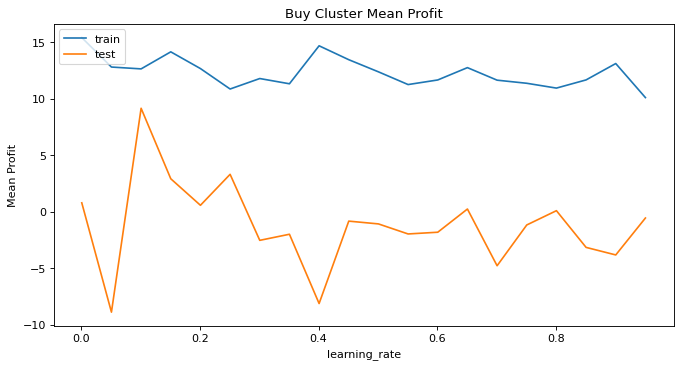

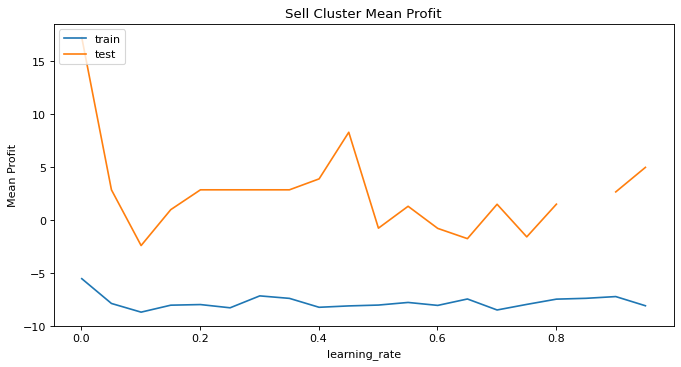

Saving photos to ./../images
Testing n_iter


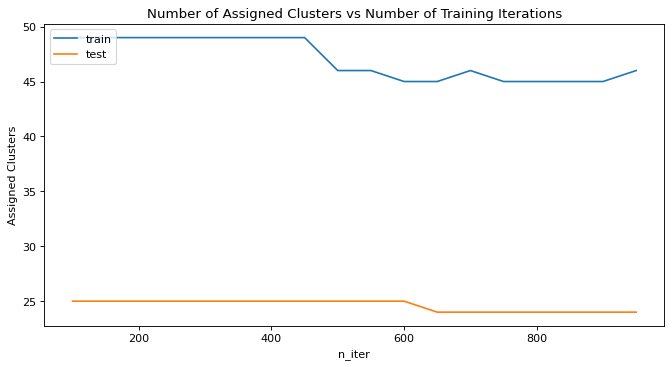

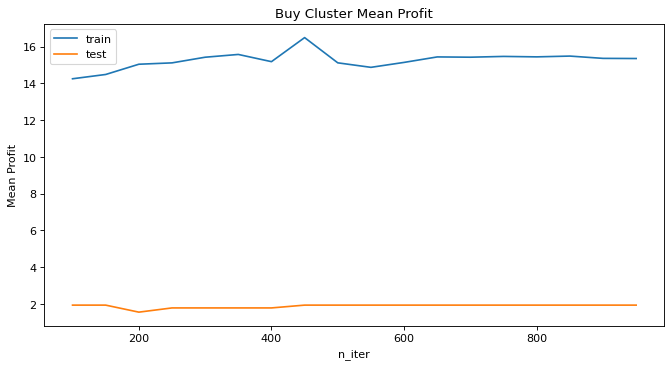

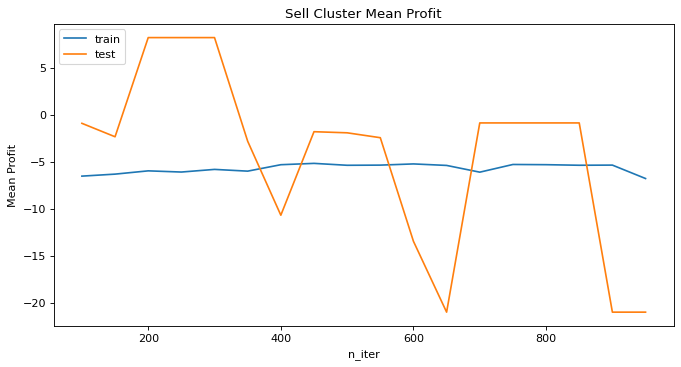

Saving photos to ./../images


In [18]:
for test_type in testing_dict:
    print(f'Testing {test_type}')
    len_df_profit_per_cluster_train_list, len_df_profit_per_cluster_test_list,\
                buy_clusters_mean_profit_train_list, sell_clusters_mean_profit_train_list,\
                buy_clusters_mean_profit_test_list, sell_clusters_mean_profit_test_list = \
                test_som_parameters(filename, columns_list, test_type=test_type, parameter_range=testing_dict[test_type])
    
    plot_summary(test_type, testing_dict[test_type], len_df_profit_per_cluster_train_list, len_df_profit_per_cluster_test_list, \
             buy_clusters_mean_profit_train_list, sell_clusters_mean_profit_train_list, \
             buy_clusters_mean_profit_test_list, sell_clusters_mean_profit_test_list)
    print('Saving photos to ./../images')

#### Results Summary

**Map Size**

Map Size has a big influence on our metrics. As we could see the number of clusters increases with the increase of the map_size. However, the increase in assigned clusters (which is less linear) is much slower than in map size (which is quadratic, notice that on the x-axis there is a root of the map size). It means that with the increasing number of map_size, the number of clusters that weren't assigned to any of the data points also increases. What is also worth noticing is the fact that with the growth of map size, the difference in assigned clusters on training and testing datasets also increases, which is rather intuitive.

The thing which can be noticed while looking at the mean profit plots is that there is always a difference between training and testing datasets. We expected that as the class for the cluster was decided to base on the training results, so the mean profit in cell clusters should usually be lower for the training data and a mean profit in the buy cluster should usually be higher for training data. 

The quality of the model should be measured basing on the testing data. As we can see there is no exact trend in the data and in some cases sell cluster wasn't assigned to any of the testing data points (in such situations the mean value equals None). What's maybe optimistic is that we can find many places in which the profit in buy clusters for the testing data is positive, while in the same the profit for the sell clusters is negative, which means that the application of the model may be useful for investments.

**Learning Rate**

It seems like the number of assigned clusters increases with the growth of the learning rate (the bigger growth can be noticed on the training dataset).

Learning rate influence also mean profits. It seems like the best-obtained result was for LR = 0.1 when the mean profit for training data was above 0 and equaled to ~9 while at the same time mean profit for sell clusters equaled to ~-2. 

**N Iters**

We would expect that parameter to increase mean profit in buy clusters and decrease mean profit in sell clusters up to some point and then set those metrics on a constant level (in case of training dataset). 
In the case of testing data, we would expect a mean profit for buy clusters to grow up to some point and then decrease. It would mean that the model accuracy increases at the beginning ( when the model is under fitted) and after crossing some point it would start to decrease (when the model will become more and more overfitted).

In our situation it is not true, the only metric which is influenced by this parameter is the mean sell profit on the testing dataset, which changes randomly. It may mean that the best form of the model is achieved before the 100th iteration (which was the smallest testing value) and after that point, there is no increase in model accuracy. 

**Sigma**

According to our test, the Sigma parameter is the least important, its influence on each of the testing metrics is marginal. 

### Testing Final Strategy

In [21]:
from modeling import *
from data_prepare import *
from plotting import *
final_df_train, final_df_test, buy_clusters_list, sell_clusters_list = create_final_strategy(filename, columns_list)

Creating final strategy for parameters: 
map_size: 70
n_iter: 1000
sigma:0.3
lr: 0.01


In [22]:
# callculating mean profit for each class on training and testing dataset
buy_clusters_train_mean_profit = final_df_train.loc[final_df_train['cluster'].isin(buy_clusters_list)]['profit'].mean()
print(f'buy_clusters_train_mean_profit: {buy_clusters_train_mean_profit}')
buy_clusters_test_mean_profit = final_df_test.loc[final_df_test['cluster'].isin(buy_clusters_list)]['profit'].mean()
print(f'buy_clusters_test_mean_profit: {buy_clusters_test_mean_profit}\n')

hold_clusters_train_mean_profit = final_df_train.loc[~final_df_train['cluster'].isin(buy_clusters_list+sell_clusters_list)]['profit'].mean()
print(f'hold_clusters_train_mean_profit: {hold_clusters_train_mean_profit}')
hold_clusters_test_mean_profit = final_df_test.loc[~final_df_test['cluster'].isin(buy_clusters_list+sell_clusters_list)]['profit'].mean()
print(f'hold_clusters_test_mean_profit: {hold_clusters_test_mean_profit}\n')

sell_clusters_train_mean_profit = final_df_train.loc[final_df_train['cluster'].isin(sell_clusters_list)]['profit'].mean()
print(f'sell_clusters_train_mean_profit: {sell_clusters_train_mean_profit}')
sell_clusters_test_mean_profit = final_df_test.loc[final_df_test['cluster'].isin(sell_clusters_list)]['profit'].mean()
print(f'sell_clusters_test_mean_profit: {sell_clusters_test_mean_profit}')

buy_clusters_train_mean_profit: 11.239292929292935
buy_clusters_test_mean_profit: 3.6554545454545475

hold_clusters_train_mean_profit: 2.713216374269005
hold_clusters_test_mean_profit: 1.6635344827586207

sell_clusters_train_mean_profit: -4.141542461005199
sell_clusters_test_mean_profit: -9.741666666666672


As we can conclude from the above summary, the mean profit for the buy class for the training dataset is 3.65, for the holding class it is 1.66 and for the selling class, it is -9.74. Such a result is satisfying because there are clear distinctions in the mean profits of each class and whats more clusters with class sell gives the smallest mean profit (which is very good, because it means that we will recommend selling a stock before it gets cheaper) and the mean profit is the highest for cluster labeled as buy ( which is also great, because we would recommend buying a stock before it gets more expensive). Clusters with hold labels got mean profit which is between sell and buy means which is also correct.

### Visualization of Buy and Sell Moments

At the above plots, we can see prices of stock ordered by the date and split into training and testing plots.
Red dots mark moments in which the stock should be sold and the green ones are the moments in which the stock should be bought. 

As we can notice, an algorithm not always will give us good advice, because in some situations we may lose money. However, according to the previous summary which shows mean profits in each class, we can earn if we would stick to every advice of the algorithm. 

If it would be a real case scenario, we should also consider issues like a commission that needs to be paid for each transaction, tax, etc. As our task is rather to test the usefulness of Kohonen's self-organizing map rather than to create a perfect strategy, we are not worrying about the fact, that the algorithm generates too many moments in which we should buy or sell. 

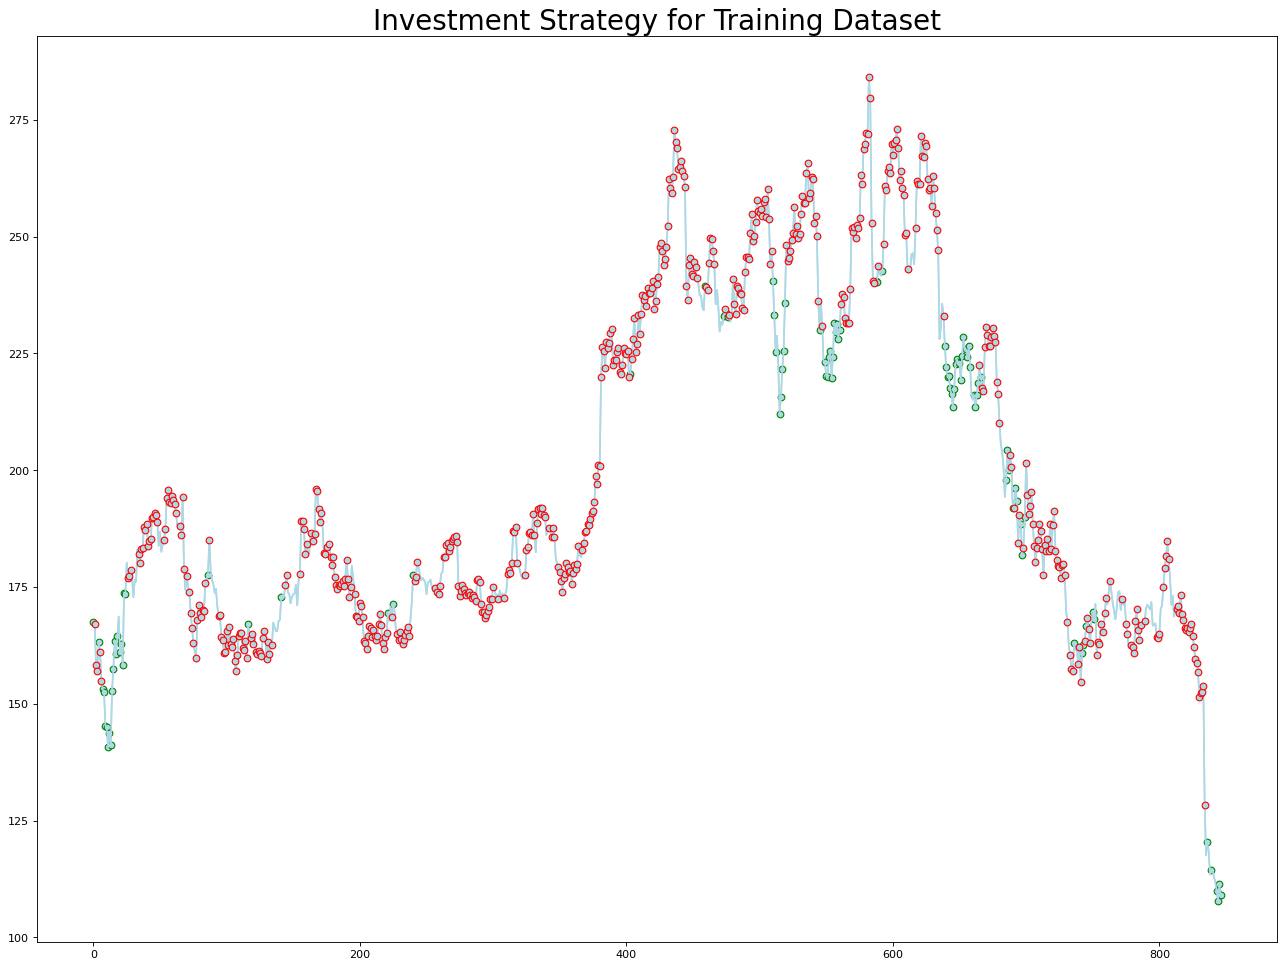

In [13]:
plot_strategy(final_df_train,'Training',buy_clusters_list, sell_clusters_list )

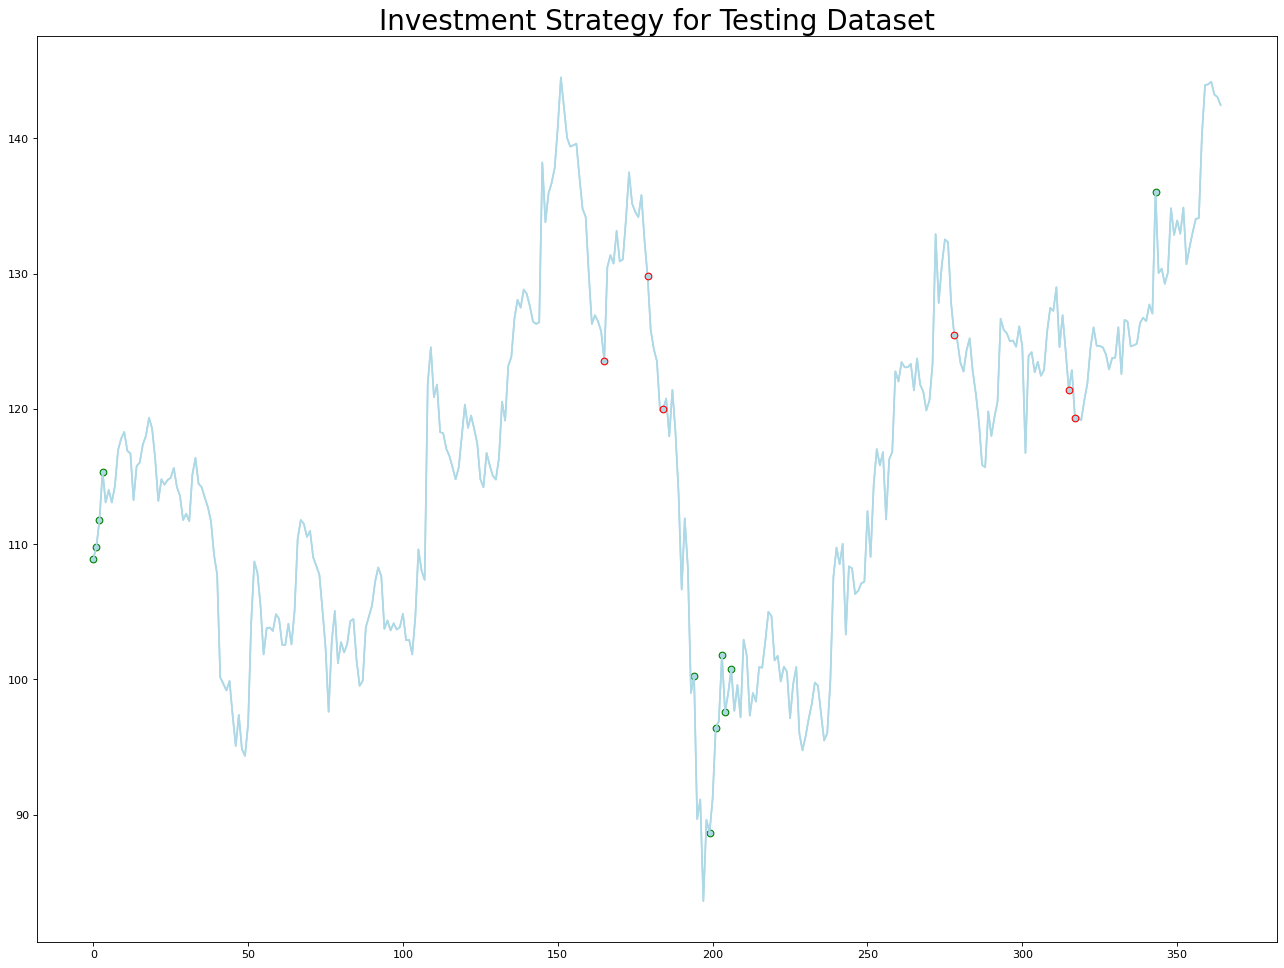

In [14]:
plot_strategy(final_df_test.reset_index(drop=True),'Testing',buy_clusters_list, sell_clusters_list )

### Summary

In the end, the model was testes on 2 more datasets (Intel and HGSH) and the summary of all three experiments can be seen below:

**Intel**:
- buy_clusters_test_mean_profit: 2.5045454545454544
- sell_clusters_test_mean_profit: -0.5252797202797201

**HGSH**
- buy_clusters_test_mean_profit: -0.11791042944785277
- sell_clusters_test_mean_profit: -0.1200000000000001

**BIDU**
- buy_clusters_test_mean_profit: 3.6554545454545475
- sell_clusters_test_mean_profit: -9.741666666666672

In the case of Intel and BIDU the result are satisfying. On average we are buying stocks that are going to be more expensive in 20 days, and selling the ones which are going to be cheaper. The strategy doesn't work for HGHS where profit for buy class is negative.

However, we treat that experiment as successful because an algorithm seems to work in most cases (2 out of 3) and in the case of HGSH, the negative profit isn't that much above 0. Assuming that we invest an equal amount in each stock, we would be able to gain money. 

We shouldn't have been expecting astonishing results, as the stock market is a very complex system and the price of the stock usually doesn't depend on the attributes based on the past stock prices - the stock price is usually dependent on the financial results of the company, world situation, etc.

What's more, in our opinion, such a system should be rather implemented with the usage of a supervised algorithm, which would focus on predicting a certain value (in our case profit in 20 days) rather than an unsupervised one like SOM. 